# Mon beau script à moi

In c:\Users\ldemontreuille\Downloads\DEV_PYTHON\wpya0254_server.log
Start date : 2019-06-20 15:53:40
End date :   2019-10-16 15:24:16
Infos count = 4079 (31 %)
Warnings count = 111 (1 %)
Errors count = 678 (5 %)
Fatals count = 0 (0 %)
------------------------------
Total lines = 13109


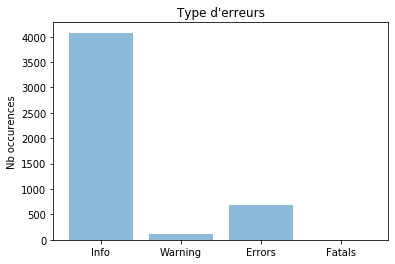

In [66]:
""" But : 
    - parcourir un fichier de log (Cassandra pour commencer) fourni en paramètre
    - compter les occurences de niveau d'erreur : INFO,WARN,ERROR, FATAL
    - afficher date de début et de fin  
    - grapher les données dans un histogramme simple : X = type, Y = nb d'erreur
    - résumer le tout dans un élégant bloc de texte. 
    - le tout en collant au PEP8 au plus près.
"""

"""Conventions :
naming variable = naming function = lowercase + underscore """

""" IMPORTS """
import sys                      # pour récupérer le nom du fichier  
import os                       # Parce que pourquoi pas 
import numpy as np              # pour tracer les graphs
import matplotlib.pyplot as plt # pour tracer les graphs


""" VARIABLES """
file_2_parse = r"c:\Users\ldemontreuille\Downloads\DEV_PYTHON\wpya0254_server.log"
error_levels = ["INFO","WARN","ERROR","FATAL"] # liste des niveaux connus. Placeholder


""" FUNCTIONS """

def get_parameter_or_get_lost():
    """Si un chemin vers un fichier est donné : il devient le paramèter file_2_parse
    Sinon on colle un defaut ou une erreur 
    Sous Windows, ça marche par trop. Le code fonctionne sous un Linux"""
    arg_file = sys.argv[0]
    try:
        with open(arg_file):
            pass                    # si ça marche, tant mieux
    except IOError:
        print("File not found")
    
def parse_file(file_2_parse):
    """Ouvre un fichier de log et compte des trucs"""
    nb_errors = nb_warnings = nb_infos = nb_fatals = nb_lines = 0 # tous les compteurs à zéro
    with open(file_2_parse,"r") as fh:                                # file handler 
        for line in fh:
            nb_lines += 1
            if ("INFO" in line) or ("WARN" in line) or ("ERROR" in line) or ("FATAL" in line) :
                line_pieces = line.split()
                error_level = line_pieces[0]
                if "INFO" in error_level:
                    nb_infos += 1
                if "WARN" in error_level:
                    nb_warnings += 1
                if "ERROR" in error_level:
                    nb_errors += 1           
                if "FATAL" in error_level:
                    nb_fatals += 1   
    return file_2_parse, nb_infos, nb_warnings, nb_errors, nb_fatals, nb_lines

def get_first_line(file_2_parse):
    """On récupère la date de la première ligne du ficher"""
    with open(file_2_parse,"r") as fh:
        for line in fh:
            if ("INFO" in line) or ("WARN" in line) or ("ERROR" in line) or ("FATAL" in line):
                first_line = fh.readlines()[0] # première ligne. Doit contenir une erreur
                break                        
    first_hour = first_line.split()[3].split(",")[0] #Récup champ date + suppression millisecondes
    first_date = [first_line.split()[2],first_line.split()[3].split(",")[0]]
    return " ".join(first_date) 

def get_last_line(file_2_parse):
    """ lecture du fichier file_2_parse par la fin"""
    with open(file_2_parse,"r") as fh:
        for line in fh:
            if ("INFO" in line) or ("WARN" in line) or ("ERROR" in line) or ("FATAL" in line):
                last_line = fh.readlines()[-1] # première ligne. Doit contenir une erreur
                break                        
    last_hour = last_line.split()[3].split(",")[0] #Récup champ date + suppression millisecondes
    last_date = [last_line.split()[2],last_line.split()[3].split(",")[0]]
    return " ".join(last_date)   

def print_header(res_tuple,f_date,l_date):  # a remplacer pour qu'elle admette un tuple
    """ Construit un résumé depuis le tuple retourné par parse_file"""
    # 1) on affecte les champs de paramètres aux bonnes variables : 
    file_2_parse = res_tuple[0]
    nb_infos = res_tuple[1]
    nb_warnings = res_tuple[2]
    nb_errors = res_tuple[3]
    nb_fatals = res_tuple[4]
    nb_lines = res_tuple[5]
    first_date = f_date
    last_date = l_date
    
    # 2) Un peu de calcul et de mise en forme
    info_percent = round((nb_infos/nb_lines)*100)
    warning_percent = round((nb_warnings/nb_lines)*100)
    error_percent = round((nb_errors/nb_lines)*100)
    fatal_percent = round((nb_fatals/nb_lines)*100)
    
    # 3) on construit le rapport, version texte
    print(f"In {file_2_parse}") 
    print(f"Start date : {first_date}\nEnd date :   {last_date}")
    print(f"Infos count = {nb_infos} ({info_percent} %)")
    print(f"Warnings count = {nb_warnings} ({warning_percent} %)")
    print(f"Errors count = {nb_errors} ({error_percent} %)")
    print(f"Fatals count = {nb_fatals} ({fatal_percent} %)")
    print("------------------------------")
    print(f"Total lines = {nb_lines}")
    
def simple_graph(res_tuple):
    """ Tracer un graph simple pour visualiser le nb d'erreur par catégorie. 
    On récupère depuis parse_file : file_2_parse, nb_infos, nb_warnings, nb_errors, nb_fatals, nb_lines"""
    
    # 1) faudrait peut-être un tableau, non ? 
    res_list = [res_tuple[1],res_tuple[2],res_tuple[3],res_tuple[4]] # liste des nb d'occurences 
    res_seq = ('Info','Warning','Errors','Fatals')                   # liste des types d'erreur 
    y_pos = np.arange(len(res_seq))                                  # Egalise les espaces entre valeurs
    plt.bar(y_pos, res_list, align='center', alpha=0.5)              # pour chaque élément de res_seq, on construit                                                                     # la barre de nb d'occurences de res_list
    plt.xticks(y_pos, res_seq)
    plt.ylabel('Nb occurences')
    plt.title("Type d'erreurs" )
    plt.show()
    
    
""" Main """
f_date=get_first_line(file_2_parse)    # on récupère la date de la première ligne 
l_date=get_last_line(file_2_parse)     # on récupère la date de la dernière ligne 
res = parse_file(file_2_parse)         # on construit le tupple avec les différents comptages 
print_header(res,f_date,l_date)        # on construit l'en-tête élégant
simple_graph(res)                      # on trace un dessin pour ceux qui n'aiment pas lire
get_parameter_or_get_lost()


In [60]:
get_parameter_or_get_lost()


-f


In [62]:
sys.argv[0]

'C:\\Users\\ldemontreuille\\Anaconda3\\lib\\site-packages\\ipykernel_launcher.py'

In [63]:
for element in sys.argv:
    print (element)

C:\Users\ldemontreuille\Anaconda3\lib\site-packages\ipykernel_launcher.py
-f
C:\Users\ldemontreuille\AppData\Roaming\jupyter\runtime\kernel-8335adcd-44aa-4a9c-a87c-3d746db805cf.json
